In [1]:
#기본 패키지

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns


In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
#머신러닝 패키지

import statsmodels.api as sm #안쓸지도
import sklearn as sk

## 마켓에서 판매할 생선 종류
- 도미 : Bream
- 곤들배기 : Smelt
- 잉어 : Roach
- 송어 : Whitefish
- 비요르마 : Parkki
- 농어 : Perch
- 빙어 : smelt
- 강꼬치고기 : Pike

### 도미 데이터 로드

##### https://gist.github.com/rickiepark/1e89fe2a9d4ad92bc9f073163c9a37a7

In [4]:
#도미 데이터 로드

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
                
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#### Scatter Flot

##### 도미당 길이당 무게의 상관관계

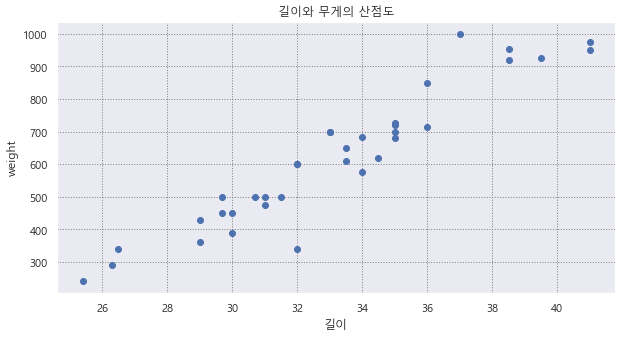

In [11]:
plt.figure(figsize=(10,5)) # 차트 크기 지정
plt.scatter(x = bream_length, y = bream_weight) #산점도 그리기
plt.title('길이와 무게의 산점도') # 차트 제목
plt.xlabel('길이') # x축 제목
plt.ylabel('weight') # y축 제목
plt.grid(color='gray', linestyle=':', linewidth=1) # 차트 격자

plt.show()


In [12]:
### smelt 데이터 로드

In [13]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [14]:
#### 빙어 산점도 (도미 산점도와 비교)

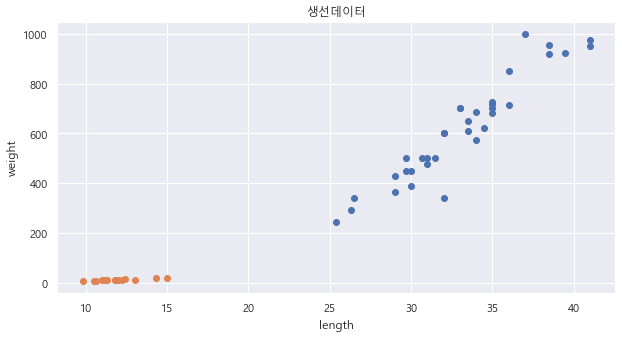

In [16]:
plt.figure(figsize=(10,5)) # 차트 크기 지정
plt.title('생선데이터') # 차트 제목
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 머신러닝 시작

### k-최근접 이웃 알고리즘 KNN(K - Nearset Neighbors)

#### 도미 빙어 데이터 합치기

In [19]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [20]:
type(fish_length)

list

In [22]:
print(fish_length)
print(fish_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


#### 1차원 리스트 2개를 2차원 배열로

In [23]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

fish_data


[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [24]:
#판다스 데이터 프레임
df = pd.DataFrame(fish_data, columns=['length', 'weight'])

In [25]:
df

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [26]:
# 넘파이 사용
df.to_numpy()

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


#### 데이터프레임으로 seaborn으로 산점도 그리기

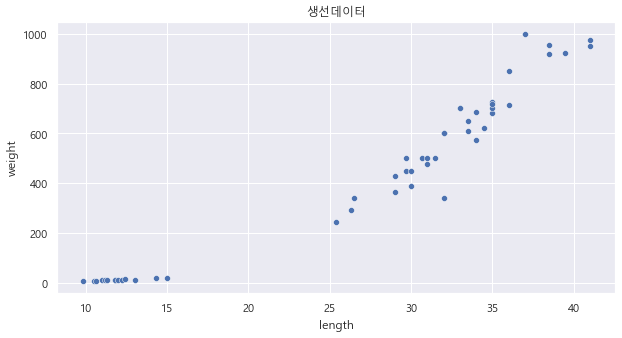

In [29]:
plt.figure(figsize=(10,5)) # 차트 크기 지정
ax = sns.scatterplot(x='length', y='weight', data=df)
plt.title('생선데이터') # 차트 제목
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 최근접 이웃 알고리즘

### 머신러닝

데이터 특증 - 길이 무게
타겟값

In [30]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [32]:
fish_target = [1] * 35 + [0] * 14 # 1도미 bream 0 빙어 smelt
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [33]:
#### 사이킷런 최근접 이웃 알고리즘 클래스
#KneighborsClassifier 임포트

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
kn = KNeighborsClassifier()
kn.fit(X=fish_data, y=fish_target)

KNeighborsClassifier()

In [37]:
#정확도 확인
kn.score(fish_data, fish_target)

1.0

In [38]:
#### KNN 재확인

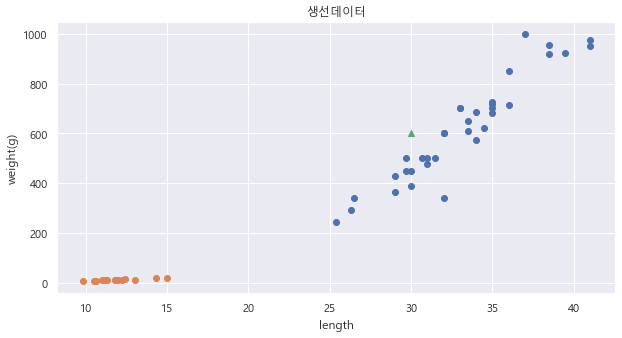

In [43]:
plt.figure(figsize=(10,5)) # 차트 크기 지정
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

#의문의 물고기 추가
plt.scatter(30, 600, marker='^')

plt.title('생선데이터') # 차트 제목
plt.xlabel('length')
plt.ylabel('weight(g)')


plt.show()

##### 예측시작

In [47]:
from array import array


kn.predict([[30, 600]])
# 1 도미 2 빙어

array([1])

#### 추가사항

In [49]:
print(kn._fit_X) # 훈련한 데이터 그대로 그림

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [50]:
print(kn._y) # 훈련한 타겟값 그대로 그림

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


#### K-최근접 이웃
최근접으로 사용하는 데이터는 5개

최근접 값으로 쓸 파라미터를 40개로 한다면? - 몇개로 하는지도 중요

In [61]:
kn40 = KNeighborsClassifier(n_neighbors=40)
kn40.fit(fish_data, fish_target)



KNeighborsClassifier(n_neighbors=40)

In [60]:
kn40.score(fish_data, fish_target)
# 1.0에서 0.71로 하락했지?

0.7142857142857143

In [58]:
print(35/40)

0.875


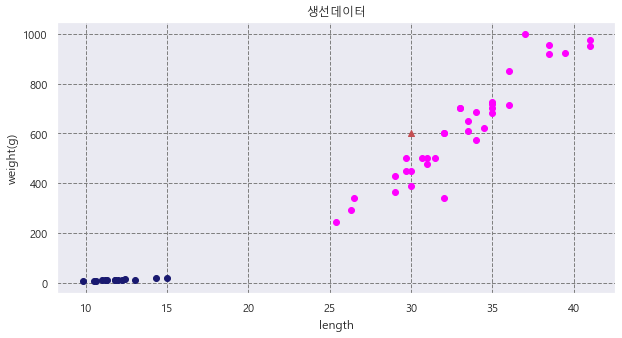

In [70]:
plt.figure(figsize=(10,5)) # 차트 크기 지정
plt.scatter(bream_length, bream_weight, c='magenta')
plt.scatter(smelt_length, smelt_weight, c='midnightblue')

plt.scatter(30,600, marker='^', c='r')

plt.title('생선데이터') # 차트 제목
plt.xlabel('length')
plt.ylabel('weight(g)')
plt.grid(color='gray', linestyle='--', linewidth=1) # 차트 격자
plt.show()

In [71]:
#### 사이킷런 최근접 이웃 알고리즘 클래스


In [ ]:
from matplotlib